# Validación modelo de velocidad
En este codigo se expondran diferentes modelos estadisticos para determinar el mas representativo para calcular velocidades

## Necesarios
* Red de infraestructura copn las velocidades y gerarquia definida
* Librerias para procesamiento de datos

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import geopandas as gp

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Bici

In [2]:
#Se cargan las dos redes de infraestructura con velocidades GPS de carro
#Red1 Corresponde a la red que fue construida sin realizar limpieza de datos GPS
red1 = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Bici/BicFP1.shp")
#red1 = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Bici/pico3.shp")
#Red2 Corresponde a la red con velocidades tratadas en los puntos GPS
#red2 = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Redes_GIS/Red_vial_modo_Ibague_vel_prub/Bici_vel.shp")
red2 = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Asignacion_Franjas/Bici/BicFP1.shp")
#A las redes se les cambia el formato de estos datos para evitar fallos
red1[['slope', 'velocity_k']] =red1[['slope', 'velocity_k']].astype(float)
red2[['slope', 'velocity_k']] =red2[['slope', 'velocity_k']].astype(float)

In [3]:
red2.columns

Index(['DIR', 'NOMENCLATU', 'CATEGORIA', 'NOMEN', 'JER_POT', 'JER_PMMEP',
       'Long_KM', 'Shape_Leng', 'angulo1', 'angulo2', 'slope', 'FID',
       'velocity_k', 'geometry'],
      dtype='object')

In [4]:
for i in range(0, len(red1)):
    if  (red1.loc[i,'JER_PMMEP'] == "Malla vía local"):
        red1.loc[i,'JER_PMMEP']="Malla víal local"
for i in range(0, len(red2)):
    if  (red2.loc[i,'JER_PMMEP'] == "Malla vía local"):
        red2.loc[i,'JER_PMMEP']="Malla víal local"

In [5]:
#Se eliminan los datos de velocidad que esten vacios para realizar los calculos RED1
#selec=np.isnan(datos['velocity_k'])
data1 = red1.dropna(subset=["velocity_k"])
print("# datos red: ", len(red1))
print("# datos sin vacios: ", len(data1))

# datos red:  27937
# datos sin vacios:  951


In [6]:
#Se eliminan los datos de velocidad que esten vacios para realizar los calculos RED2
#selec=np.isnan(datos['velocity_k'])
data2 = red2.dropna(subset=["velocity_k"])
print("# datos red: ", len(red2))
print("# datos sin vacios: ", len(data2))

# datos red:  27937
# datos sin vacios:  951


## Box Plot
## Media y desv std

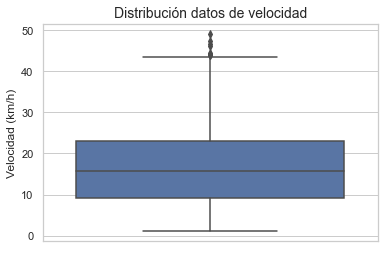

In [7]:
#Se realiza el boxplot de las velocidades en carro RED1
sns.set_theme(style="whitegrid")
boxplot = sns.boxplot(y=data1["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
plt.show()

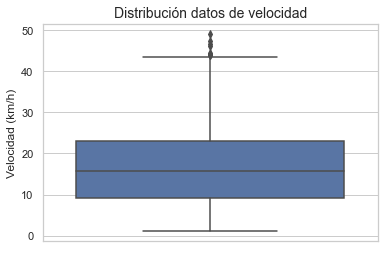

In [8]:
#Se realiza el boxplot de las velocidades en carro RED2
boxplot = sns.boxplot(y=data2["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
plt.show()

In [9]:
#La media aritmética se define como la suma de N elementos dividida entre N.
media1 = data1["velocity_k"].mean()
media2 = data2["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana1 = data1["velocity_k"].median()
mediana2 = data2["velocity_k"].median()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstd1 = data1["velocity_k"].std(ddof=0)
desvstd2 = data2["velocity_k"].std(ddof=0)
var1 = data1["velocity_k"].var(ddof=0)
var2 = data2["velocity_k"].var(ddof=0)

print("Media1: ", media1)
print("Media2: ", media2)
print(" ")
print("Mediana1: ", mediana1)
print("Mediana2: ", mediana2)
print(" ")
print("Desviasión estandar1: ", desvstd1)
print("Desviasión estandar2: ", desvstd2)
print(" ")
print("Variancia1: ", var1)
print("Variancia2: ", var2)

Media1:  16.872205902657388
Media2:  16.872205902657388
 
Mediana1:  15.675144654141086
Mediana2:  15.675144654141086
 
Desviasión estandar1:  9.884048761174345
Desviasión estandar2:  9.884048761174345
 
Variancia1:  97.6944199132721
Variancia2:  97.6944199132721


Text(0, 0.5, 'Jerarquia segun PMMEP')

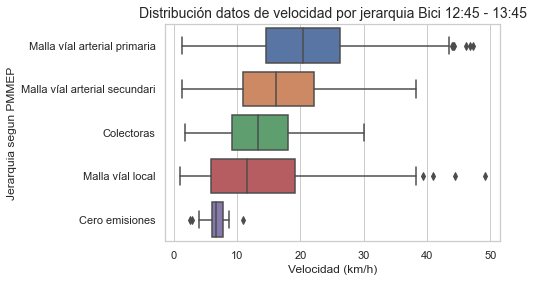

In [10]:
#Se realiza el boxplot de las velocidades en carro de la RED1 teniendo en cuenta la jerarquia de estas
boxplot = sns.boxplot(y=data1["JER_PMMEP"], x=data1["velocity_k"],
                     order=["Malla víal arterial primaria", "Malla víal arterial secundari", "Colectoras", "Malla víal local", "Cero emisiones"])
boxplot.axes.set_title("Distribución datos de velocidad por jerarquia Bici 12:45 - 13:45", fontsize=14)
boxplot.set_xlabel("Velocidad (km/h)", fontsize=12)
boxplot.set_ylabel("Jerarquia segun PMMEP", fontsize=12)
#plt.show()
#plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici8V2.png", dpi = 600)

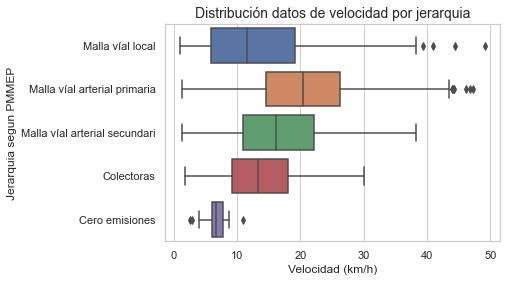

In [11]:
#Se realiza el boxplot de las velocidades en carro de la RED2 teniendo en cuenta la jerarquia de estas
boxplot = sns.boxplot(y=data2["JER_PMMEP"], x=data2["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad por jerarquia", fontsize=14)
boxplot.set_xlabel("Velocidad (km/h)", fontsize=12)
boxplot.set_ylabel("Jerarquia segun PMMEP", fontsize=12)
plt.show()

In [12]:
#Se separan los datos para determinar los valores estadisticos de la red dividida por jerarquia
red1primaria = data1[(data1.JER_PMMEP == "Malla víal arterial primaria")]
red2primaria = data2[(data2.JER_PMMEP == "Malla víal arterial primaria")]
red1secundaria = data1[(data1.JER_PMMEP == "Malla víal arterial secundari")]
red2secundaria = data2[(data2.JER_PMMEP == "Malla víal arterial secundari")]
red1local = data1[(data1.JER_PMMEP == "Malla víal local")]
red2local = data2[(data2.JER_PMMEP == "Malla víal local")]
red1colectora = data1[(data1.JER_PMMEP == "Colectoras")]
red2colectora = data2[(data2.JER_PMMEP == "Colectoras")]
red1cero = data1[(data1.JER_PMMEP == "Cero emisiones")]
red2cero = data2[(data2.JER_PMMEP == "Cero emisiones")]

#Secalculan los datos segun su jerarquia para la red 1
#La media aritmética se define como la suma de N elementos dividida entre N.
media1 = red1primaria["velocity_k"].mean()
media2 = red1secundaria["velocity_k"].mean()
media3 = red1local["velocity_k"].mean()
media4 = red1colectora["velocity_k"].mean()
media5 = red1cero["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana1 = red1primaria["velocity_k"].median()
mediana2 = red1secundaria["velocity_k"].median()
mediana3 = red1local["velocity_k"].median()
mediana4 = red1colectora["velocity_k"].median()
mediana5 = red1cero["velocity_k"].median()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstd1 = red1primaria["velocity_k"].std(ddof=0)
desvstd2 = red1secundaria["velocity_k"].std(ddof=0)
desvstd3 = red1local["velocity_k"].std(ddof=0)
desvstd4 = red1colectora["velocity_k"].std(ddof=0)
desvstd5 = red1cero["velocity_k"].std(ddof=0)

var1 = red1primaria["velocity_k"].var(ddof=0)
var2 = red1secundaria["velocity_k"].var(ddof=0)
var3 = red1local["velocity_k"].var(ddof=0)
var4 = red1colectora["velocity_k"].var(ddof=0)
var5 = red1cero["velocity_k"].var(ddof=0)

#Secalculan los datos segun su jerarquia para la red 2
#La media aritmética se define como la suma de N elementos dividida entre N.
media12 = red2primaria["velocity_k"].mean()
media22 = red2secundaria["velocity_k"].mean()
media32 = red2local["velocity_k"].mean()
media42 = red2colectora["velocity_k"].mean()
media52 = red2cero["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana12 = red2primaria["velocity_k"].median()
mediana22 = red2secundaria["velocity_k"].median()
mediana32 = red2local["velocity_k"].median()
mediana42 = red2colectora["velocity_k"].median()
mediana52 = red2cero["velocity_k"].median()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstd12 = red2primaria["velocity_k"].std(ddof=0)
desvstd22 = red2secundaria["velocity_k"].std(ddof=0)
desvstd32 = red2local["velocity_k"].std(ddof=0)
desvstd42 = red2colectora["velocity_k"].std(ddof=0)
desvstd52 = red2cero["velocity_k"].std(ddof=0)

var12 = red2primaria["velocity_k"].var(ddof=0)
var22 = red2secundaria["velocity_k"].var(ddof=0)
var32 = red2local["velocity_k"].var(ddof=0)
var42 = red2colectora["velocity_k"].var(ddof=0)
var52 = red2cero["velocity_k"].var(ddof=0)

#Se imprimen para visualizar
print("Malla víal arterial primaria")
print("red 1")
print("Media: ", media1)
print("Mediana: ", mediana1)
print("Desviasión estandar: ", desvstd1)
print("Variancia: ", var1)
print("red 2")
print("Media: ", media12)
print("Mediana: ", mediana12)
print("Desviasión estandar: ", desvstd12)
print("Variancia: ", var12)
print(" ------------------------------------- ")
print("Malla víal arterial secundari")
print("red 1")
print("Media: ", media2)
print("Mediana: ", mediana2)
print("Desviasión estandar: ", desvstd2)
print("Variancia: ", var2)
print("red 2")
print("Media: ", media22)
print("Mediana: ", mediana22)
print("Desviasión estandar: ", desvstd22)
print("Variancia: ", var22)
print(" ------------------------------------- ")
print("Malla víal local")
print("red 1")
print("Media: ", media3)
print("Mediana: ", mediana3)
print("Desviasión estandar: ", desvstd3)
print("Variancia: ", var3)
print("red 2")
print("Media: ", media32)
print("Mediana: ", mediana32)
print("Desviasión estandar: ", desvstd32)
print("Variancia: ", var32)
print(" ------------------------------------- ")
print("Colectoras")
print("red 1")
print("Media: ", media4)
print("Mediana: ", mediana4)
print("Desviasión estandar: ", desvstd4)
print("Variancia: ", var4)
print("red 2")
print("Media: ", media42)
print("Mediana: ", mediana42)
print("Desviasión estandar: ", desvstd42)
print("Variancia: ", var42)
print(" ------------------------------------- ")
print("Cero emisiones")
print("red 1")
print("Media: ", media5)
print("Mediana: ", mediana5)
print("Desviasión estandar: ", desvstd5)
print("Variancia: ", var5)
print("red 2")
print("Media: ", media52)
print("Mediana: ", mediana52)
print("Desviasión estandar: ", desvstd52)
print("Variancia: ", var52)


Malla víal arterial primaria
red 1
Media:  21.394457093439506
Mediana:  20.368836256467524
Desviasión estandar:  9.283968293143925
Variancia:  86.19206726810172
red 2
Media:  21.394457093439506
Mediana:  20.368836256467524
Desviasión estandar:  9.283968293143925
Variancia:  86.19206726810172
 ------------------------------------- 
Malla víal arterial secundari
red 1
Media:  16.937225699266815
Mediana:  16.194564847843132
Desviasión estandar:  8.747502397945096
Variancia:  76.51879820205521
red 2
Media:  16.937225699266815
Mediana:  16.194564847843132
Desviasión estandar:  8.747502397945096
Variancia:  76.51879820205521
 ------------------------------------- 
Malla víal local
red 1
Media:  13.622559177169823
Mediana:  11.483707741111179
Desviasión estandar:  9.615731135824225
Variancia:  92.46228527645943
red 2
Media:  13.622559177169823
Mediana:  11.483707741111179
Desviasión estandar:  9.615731135824225
Variancia:  92.46228527645943
 ------------------------------------- 
Colectoras
r

# Regresión lineal

## Vías primarias

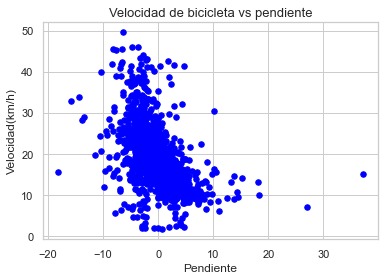

In [159]:
# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2primaria['slope'].values
f2 = red2primaria['velocity_k'].values
  
plt.scatter(f1, f2, c='blue', s=tamanios[0])
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Velocidad de bicicleta vs pendiente", fontsize=13)
plt.show()

In [160]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = red2primaria['slope'], y =  red2primaria['velocity_k'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.5285931600427171
P-value:  2.1624726340328818e-96


In [161]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = red2primaria[["slope"]]
X_train = np.array(dataX)
y_train = red2primaria['velocity_k'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score R2: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [-1.01919824]
Independent term: 
 18.59985927940782
Mean squared error: 43.67
Variance score R2: 0.28


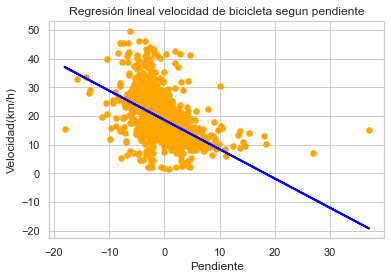

In [162]:
# Se grafican los puntos

# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2primaria['slope'].values
f2 = red2primaria['velocity_k'].values


plt.scatter(f1, f2, c='orange', s=tamanios[0])
plt.plot(X_train, y_pred, color='blue', linewidth=2)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad de bicicleta segun pendiente", fontsize=12)
plt.show()

# Statsmodels
La implementación de regresión lineal de **Statsmodels**, es más completa que la de **Scikitlearn** ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. **Statsmodels** tiene dos formas de entrenar el modelo:

* Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en **R**.

* Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por **Scikitlearn** con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [163]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
# modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

In [164]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
regre = sm.OLS(endog=y_train, exog=X_train,)
regre = regre.fit()
print(regre.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     513.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           2.16e-96
Time:                        17:04:50   Log-Likelihood:                -4388.7
No. Observations:                1327   AIC:                             8781.
Df Residuals:                    1325   BIC:                             8792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5999      0.182    102.362      0.0

# Intervalos de confianza de los coeficientes

In [165]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
regre.conf_int(alpha=0.05)

array([[18.24339339, 18.95632517],
       [-1.10740829, -0.93098819]])

# Predicciones


Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

* <.predict()>: devuelve únicamente el valor de las predicciones.

* <.get_prediction().summary_frame()>: devuelve, además de las predicciones, los intervalos de confianza asociados.

In [166]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,22.755843,0.263642,22.238642,23.273043,9.772252,35.739434
1,20.743062,0.208419,20.334194,21.151929,7.763335,33.722789
2,23.940856,0.303694,23.345082,24.536630,10.953898,36.927814
3,19.293574,0.185563,18.929546,19.657603,6.315183,32.271966


# Representación gráfica del modelo


Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor **promedio** de la variable respuesta.

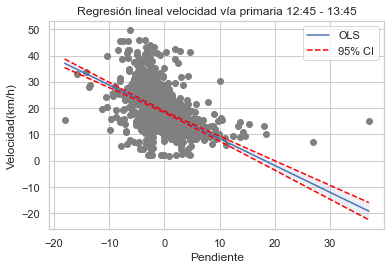

In [167]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad vía primaria 12:45 - 13:45", fontsize=12)
ax.legend();
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici9V2-1.png", dpi = 600)

## Vías secundarias

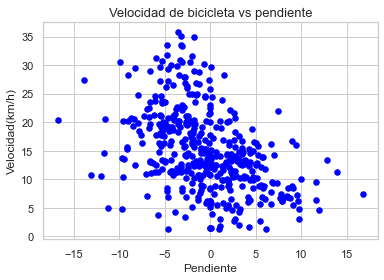

In [168]:
# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2secundaria['slope'].values
f2 = red2secundaria['velocity_k'].values
  
plt.scatter(f1, f2, c='blue', s=tamanios[0])
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Velocidad de bicicleta vs pendiente", fontsize=13)
plt.show()

In [169]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = red2secundaria['slope'], y =  red2secundaria['velocity_k'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.4314803172899793
P-value:  5.12676910339523e-21


In [170]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = red2secundaria[["slope"]]
X_train = np.array(dataX)
y_train = red2secundaria['velocity_k'].values

# Creamos el objeto de Regresión Linear
regr2 = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr2.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr2.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr2.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr2.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score R2: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.6425976]
Independent term: 
 14.625498138888885
Mean squared error: 41.67
Variance score R2: 0.19


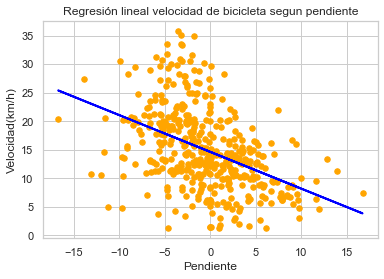

In [171]:
# Se grafican los puntos

# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2secundaria['slope'].values
f2 = red2secundaria['velocity_k'].values


plt.scatter(f1, f2, c='orange', s=tamanios[0])
plt.plot(X_train, y_pred, color='blue', linewidth=2)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad de bicicleta segun pendiente", fontsize=12)
plt.show()

In [172]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
regre2 = sm.OLS(endog=y_train, exog=X_train,)
regre2 = regre2.fit()
print(regre2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     98.37
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           5.13e-21
Time:                        17:05:08   Log-Likelihood:                -1418.6
No. Observations:                 432   AIC:                             2841.
Df Residuals:                     430   BIC:                             2849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6255      0.314     46.622      0.0

In [173]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
regre2.conf_int(alpha=0.05)

array([[14.00891481, 15.24208147],
       [-0.76994249, -0.5152527 ]])

In [174]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre2.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,18.025327,0.435172,17.169998,18.880657,5.279103,30.771552
1,17.270600,0.385859,16.512195,18.029004,4.530512,30.010687
2,14.972555,0.311328,14.360640,15.584469,2.240348,27.704762
3,15.065231,0.311357,14.453261,15.677202,2.333022,27.797441


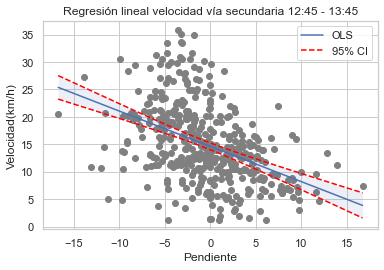

In [175]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre2.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad vía secundaria 12:45 - 13:45", fontsize=12)
ax.legend();
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici9V2-2.png", dpi = 600)

## Vías Locales

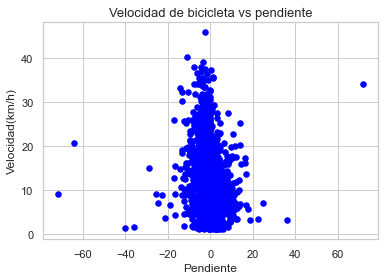

In [176]:
# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2local['slope'].values
f2 = red2local['velocity_k'].values
  
plt.scatter(f1, f2, c='blue', s=tamanios[0])
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Velocidad de bicicleta vs pendiente", fontsize=13)
plt.show()

In [177]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = red2local['slope'], y =  red2local['velocity_k'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.19169019351041822
P-value:  3.968740563492697e-15


In [178]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = red2local[["slope"]]
X_train = np.array(dataX)
y_train = red2local['velocity_k'].values

# Creamos el objeto de Regresión Linear
regr3 = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr3.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr3.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr3.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr3.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score R2: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.22043208]
Independent term: 
 12.26103781359342
Mean squared error: 49.36
Variance score R2: 0.04


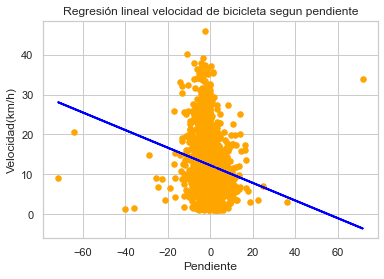

In [179]:
# Se grafican los puntos

# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2local['slope'].values
f2 = red2local['velocity_k'].values


plt.scatter(f1, f2, c='orange', s=tamanios[0])
plt.plot(X_train, y_pred, color='blue', linewidth=2)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad de bicicleta segun pendiente", fontsize=12)
plt.show()

In [180]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
regre3 = sm.OLS(endog=y_train, exog=X_train,)
regre3 = regre3.fit()
print(regre3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     62.90
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           3.97e-15
Time:                        17:05:30   Log-Likelihood:                -5561.4
No. Observations:                1651   AIC:                         1.113e+04
Df Residuals:                    1649   BIC:                         1.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2610      0.173     70.861      0.0

In [181]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
regre3.conf_int(alpha=0.05)

array([[11.92165649, 12.60041913],
       [-0.27494534, -0.16591882]])

In [182]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre3.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.857895,0.180964,11.502953,12.212838,-1.935458,25.651248
1,13.047479,0.198326,12.658483,13.436476,-0.746792,26.841750
2,12.077770,0.174858,11.734803,12.420738,-1.715280,25.870820
3,12.905697,0.190228,12.532584,13.278810,-0.888135,26.699530


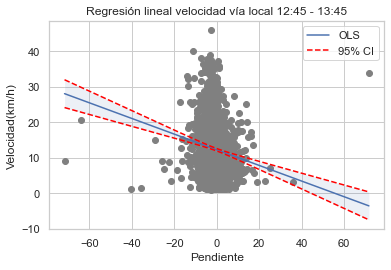

In [183]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre3.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad vía local 12:45 - 13:45", fontsize=12)
ax.legend();
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici9V2-3.png", dpi = 600)

## Vías colectoras

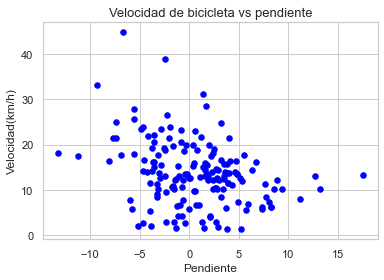

In [184]:
# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2colectora['slope'].values
f2 = red2colectora['velocity_k'].values
  
plt.scatter(f1, f2, c='blue', s=tamanios[0])
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Velocidad de bicicleta vs pendiente", fontsize=13)
plt.show()

In [185]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = red2colectora['slope'], y =  red2colectora['velocity_k'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.31566465675815025
P-value:  3.626696131745606e-05


In [186]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = red2colectora[["slope"]]
X_train = np.array(dataX)
y_train = red2colectora['velocity_k'].values

# Creamos el objeto de Regresión Linear
regr4 = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr4.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr4.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr4.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr4.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score R2: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.4855915]
Independent term: 
 13.911405546644659
Mean squared error: 45.58
Variance score R2: 0.10


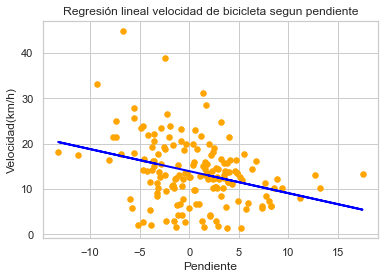

In [187]:
# Se grafican los puntos

# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2colectora['slope'].values
f2 = red2colectora['velocity_k'].values


plt.scatter(f1, f2, c='orange', s=tamanios[0])
plt.plot(X_train, y_pred, color='blue', linewidth=2)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad de bicicleta segun pendiente", fontsize=12)
plt.show()

In [188]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
regre4 = sm.OLS(endog=y_train, exog=X_train,)
regre4 = regre4.fit()
print(regre4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     18.04
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           3.63e-05
Time:                        17:05:51   Log-Likelihood:                -549.24
No. Observations:                 165   AIC:                             1102.
Df Residuals:                     163   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9114      0.533     26.091      0.0

In [189]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
regre4.conf_int(alpha=0.05)

array([[12.85857949, 14.9642316 ],
       [-0.71134939, -0.2598336 ]])

In [190]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre4.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,12.965577,0.551000,11.877559,14.053595,-0.491963,26.423117
1,12.641277,0.577113,11.501695,13.780859,-0.820530,26.103084
2,13.911406,0.533178,12.858579,14.964232,0.456665,27.366146
3,13.029369,0.546972,11.949304,14.109434,-0.427530,26.486269


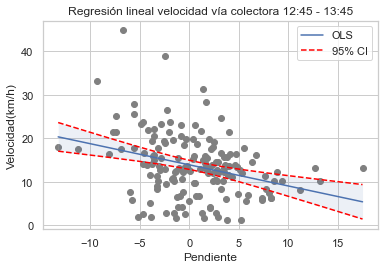

In [191]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre4.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad vía colectora 12:45 - 13:45", fontsize=12)
ax.legend();
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici9V2-4.png", dpi = 600)

## Vías Cero emisiones

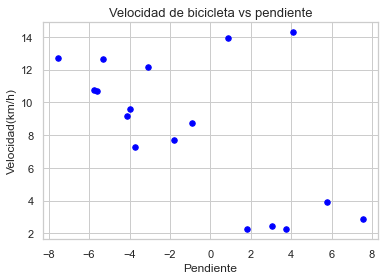

In [192]:
# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2cero['slope'].values
f2 = red2cero['velocity_k'].values
  
plt.scatter(f1, f2, c='blue', s=tamanios[0])
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Velocidad de bicicleta vs pendiente", fontsize=13)
plt.show()

In [193]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = red2cero['slope'], y =  red2cero['velocity_k'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.5966376593141989
P-value:  0.011462946870265056


In [194]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = red2cero[["slope"]]
X_train = np.array(dataX)
y_train = red2cero['velocity_k'].values

# Creamos el objeto de Regresión Linear
regr5 = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr5.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr5.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr5.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr5.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score R2: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [-0.56126995]
Independent term: 
 7.950378424958242
Mean squared error: 11.09
Variance score R2: 0.36


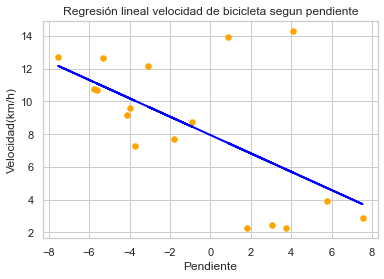

In [195]:
# Se grafican los puntos

# Se grafican los puntos
colores=['orange','blue']
tamanios=[30,60]

f1 = red2cero['slope'].values
f2 = red2cero['velocity_k'].values


plt.scatter(f1, f2, c='orange', s=tamanios[0])
plt.plot(X_train, y_pred, color='blue', linewidth=2)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad de bicicleta segun pendiente", fontsize=12)
plt.show()

In [196]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
regre5 = sm.OLS(endog=y_train, exog=X_train,)
regre5 = regre5.fit()
print(regre5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     8.291
Date:                Tue, 12 Jul 2022   Prob (F-statistic):             0.0115
Time:                        17:06:07   Log-Likelihood:                -44.574
No. Observations:                  17   AIC:                             93.15
Df Residuals:                      15   BIC:                             94.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9504      0.877      9.069      0.0

In [197]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
regre5.conf_int(alpha=0.05)

array([[ 6.08181696,  9.81893989],
       [-0.97674162, -0.14579828]])

In [198]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre5.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.185205,1.283350,8.449810,13.920601,3.148627,19.221784
1,12.176755,1.556179,8.859838,15.493673,3.924110,20.429401
2,10.917963,1.216043,8.326028,13.509897,2.929074,18.906851
3,10.046407,1.024617,7.862488,12.230327,2.180423,17.912392


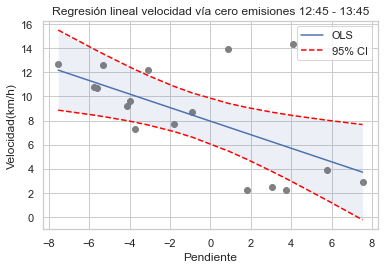

In [199]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = regre5.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
plt.xlabel("Pendiente")
plt.ylabel("Velocidad(km/h)")
plt.title("Regresión lineal velocidad vía cero emisiones 12:45 - 13:45", fontsize=12)
ax.legend();
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici9V2-5.png", dpi = 600)

# Asignación de velocidad media a la red

A partir de los modelos de regresión lineal construidos se asignan las velocidades a los arcos faltantes por velocidad segun la jerarquia y la pendiente

In [151]:
#Se define una nueva red para no afectar la original y se cambian los valores NaN por valores de 0
redfin=red2
redfin['velocity_k'] = redfin['velocity_k'].fillna(0)

In [152]:
#Se busca celda por celda la jerarquia y que tengan valores de 0 para una vez identificados se asignan las velocidades media calculadas
for i in range(0, len(red2)):
    if  ((redfin.loc[i,'JER_PMMEP'] == "Malla víal arterial primaria") & (redfin.loc[i,'velocity_k'] == 0)):
        xi=redfin.loc[i,'slope']
        redfin.loc[i,'velocity_k'] = regr.predict([[xi]])
    elif ((redfin.loc[i,'JER_PMMEP'] == "Malla víal arterial secundari") & (redfin.loc[i,'velocity_k'] == 0)):
        xj=redfin.loc[i,'slope']
        redfin.loc[i,'velocity_k'] = regr2.predict([[xj]])
    elif ((redfin.loc[i,'JER_PMMEP'] == "Malla víal local") & (redfin.loc[i,'velocity_k'] == 0)):
        xk=redfin.loc[i,'slope']
        redfin.loc[i,'velocity_k'] = regr3.predict([[xk]])
    elif ((redfin.loc[i,'JER_PMMEP'] == "Colectoras") & (redfin.loc[i,'velocity_k'] == 0)):
        xl=redfin.loc[i,'slope']
        redfin.loc[i,'velocity_k'] = regr4.predict([[xl]])
    elif ((redfin.loc[i,'JER_PMMEP'] == "Cero emisiones") & (redfin.loc[i,'velocity_k'] == 0)):
        xm=redfin.loc[i,'slope']
        redfin.loc[i,'velocity_k'] = regr5.predict([[xm]])

In [153]:
for i in range(0, len(red2)):
    if  (redfin.loc[i,'velocity_k'] <= 1.5):
        redfin.loc[i,'velocity_k'] = 1.5
    elif (redfin.loc[i,'velocity_k'] >= 50):
        redfin.loc[i,'velocity_k'] = 50

In [154]:
redfin["long_m"] = redfin['geometry'].length
redfin["TV"] = ((redfin['long_m']/redfin['velocity_k'])*(60/1000))
redfin

,DIR,NOMENCLATU,CATEGORIA,NOMEN,JER_POT,JER_PMMEP,Long_KM,Shape_Leng,angulo1,angulo2,slope,FID,velocity_k,geometry,long_m,TV
0,1,CALLE 20,CALLE-PRIMER-ORDEN,Cl 20,Malla víal local,Malla víal local,0.068802,68.801895,36.123963,36.445994,1.828875,0,22.003983,"LINESTRING (871466.763 982507.100, 871475.997 ...",68.801895,0.187608
1,1,CALLE 19,CALLE-PRIMER-ORDEN,Cl 19,Malla víal arterial primaria,Malla víal arterial primaria,0.089808,89.808234,199.524533,216.501489,-4.077699,1,18.159132,"LINESTRING (871505.831 982644.298, 871503.591 ...",89.808234,0.296737
2,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial secundari,Colectoras,0.102935,102.934913,302.580455,303.041108,4.033832,2,11.952611,"LINESTRING (871535.268 982798.544, 871524.511 ...",102.934913,0.516715
3,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial secundari,0.117046,117.046090,114.747128,114.807639,-5.290759,3,11.888188,"LINESTRING (871431.414 983044.357, 871436.073 ...",117.046090,0.590735
4,1,CARRERA 4,CARRERA-PRIMER-ORDEN,Cr 4,Malla víal arterial primaria,Malla víal arterial primaria,0.114319,114.318731,117.520102,118.003455,-2.102832,4,29.649535,"LINESTRING (871398.372 983211.089, 871431.759 ...",114.318731,0.231340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27932,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,312.258774,312.258774,-1.806031,27932,12.659145,"LINESTRING (869194.863 980597.050, 869180.060 ...",19.999996,0.094793
27933,1,CARRERA 27 SUR,CARRERA-PRIMER-ORDEN,Cr 27 sur,Malla víal local,Malla víal local,0.020000,19.999996,132.258774,132.258774,1.806031,27933,11.862931,"LINESTRING (869180.060 980610.499, 869194.863 ...",19.999996,0.101155
27934,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,186.866659,186.866659,2.216708,27934,11.772404,"LINESTRING (878100.150 981265.301, 878097.793 ...",19.719950,0.100506
27935,1,CALLE 94,CALLE-PRIMER-ORDEN,Cl 94,Malla víal local,Malla víal local,0.019720,19.719950,6.866659,6.866659,-2.216708,27935,12.309436,"LINESTRING (878097.793 981245.722, 878100.150 ...",19.719950,0.096121


In [155]:
redfin.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Red_Vel_Franjas/Bici/BicFV2.shp")

In [156]:
gdf = redfin.to_crs({"init":"EPSG:4326"})
gdf.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Red_Inf_Vial/Red_Vel_Franjas/Bici/WGS84/BicFV2.shp")